In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.datasets._samples_generator import make_blobs
from scipy.spatial.distance import cdist

In [155]:
X = pd.read_excel("C:/Users/wkaco/Desktop/Assets_data.xlsx")
macro_data = pd.read_excel("C:/Users/wkaco/Desktop/macro_data.xlsx")

In [156]:
macro_data.head()

,Date,GDP,Inflation,Unemployment,Debt_Change,Credit_Spread,M2
0,2012-01-01,0.001737,0.020161,0.083,0.006634,0.010750,0.001206
1,2012-02-01,0.001502,0.021228,0.082,0.005062,0.010148,0.011206
2,2012-03-01,0.001217,0.021918,0.082,0.004145,0.011204,0.005521
3,2012-04-01,0.000882,0.021882,0.082,0.003867,0.011330,-0.006514
4,2012-05-01,0.000497,0.022389,0.082,0.004215,0.011604,0.006729


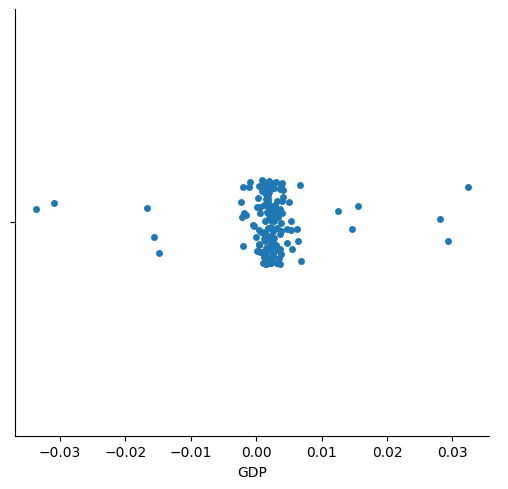

In [128]:
sns.catplot(data=macro_data, x='GDP')

In [129]:
macro_data["GDP"]

0      0.001737
1      0.001502
2      0.001217
3      0.000882
4      0.000497
5      0.000061
6     -0.000274
7      0.000099
8      0.001331
9      0.003044
10     0.003738
11     0.003051
12     0.001419
13     0.000513
14     0.000743
15     0.001867
16     0.002931
17     0.003693
18     0.004007
19     0.003287
20     0.001400
21    -0.001082
22    -0.001897
23    -0.000476
24     0.002575
25     0.004778
26     0.005513
27     0.005007
28     0.004100
29     0.003000
30     0.001877
31     0.001410
32     0.001762
33     0.002684
34     0.003206
35     0.003088
36     0.002485
37     0.001980
38     0.001717
39     0.001620
40     0.001398
41     0.000979
42     0.000489
43     0.000430
44     0.000925
45     0.001769
46     0.002149
47     0.001866
48     0.001142
49     0.000853
50     0.001213
51     0.002028
52     0.002528
53     0.002522
54     0.002126
55     0.001789
56     0.001618
57     0.001590
58     0.001612
59     0.001659
60     0.001735
61     0.001849
62     0

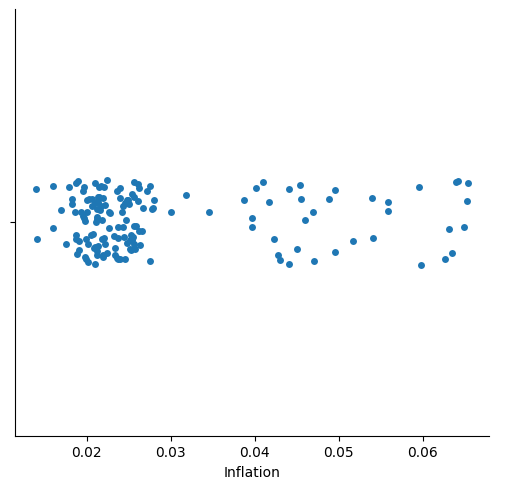

In [130]:
sns.catplot(data=macro_data, x ='Inflation')

In [131]:

def elbow_method_gmm(data, n_clusters_range=(1, 40)):
    """
    Perform elbow method analysis for Gaussian Mixture Models.
    
    Parameters:
    data: array-like, shape (n_samples, n_features)
    n_clusters_range: tuple, range of clusters to try (min, max)
    
    Returns:
    list: Mean distances for each number of clusters
    """
    # Reshape data if it's 1D
    if len(data.shape) == 1:
        data = data.values.reshape(-1, 1)
    
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    meandist = []
    n_clusters = range(n_clusters_range[0], n_clusters_range[1])
    
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster, random_state=42)
        gmm.fit(data_scaled)
        
        # Calculate BIC score instead of Mahalanobis distance
        bic_score = gmm.bic(data_scaled)
        meandist.append(bic_score)
    
    return n_clusters, meandist

def plot_elbow(n_clusters, scores, title):
    """
    Plot the elbow curve.
    
    Parameters:
    n_clusters: range of cluster numbers
    scores: list of scores (BIC)
    title: string, plot title
    """
    plt.figure(figsize=(10, 6))
    plt.plot(list(n_clusters), scores, 'bo-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('BIC Score')
    plt.title(f'GMM Clustering Elbow Method: {title}')
    plt.grid(True)
    plt.show()

# Analyze both GDP and Inflation
def analyze_clustering(macro_data):
    # GDP Analysis
    gdp_clusters, gdp_scores = elbow_method_gmm(macro_data[['GDP']])
    plot_elbow(gdp_clusters, gdp_scores, 'GDP')
    
    # Inflation Analysis
    inflation_clusters, inflation_scores = elbow_method_gmm(macro_data[['Inflation']])
    plot_elbow(inflation_clusters, inflation_scores, 'Inflation')
    
    # Joint Analysis (GDP and Inflation together)
    joint_clusters, joint_scores = elbow_method_gmm(macro_data[['GDP', 'Inflation']])
    plot_elbow(joint_clusters, joint_scores, 'GDP & Inflation Combined')

def fit_optimal_gmm(data, n_components):
    """
    Fit GMM with optimal number of components.
    
    Parameters:
    data: array-like
    n_components: int, optimal number of components
    
    Returns:
    GaussianMixture: fitted model
    array: cluster labels
    """
    if len(data.shape) == 1:
        data = data.values.reshape(-1, 1)
    
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data_scaled)
    labels = gmm.predict(data_scaled)
    
    return gmm, labels

# Example usage:
# analyze_clustering(macro_data)

# After identifying optimal number of clusters (n) from the elbow plots:
# gmm_model, cluster_labels = fit_optimal_gmm(macro_data[['GDP', 'Inflation']], n)

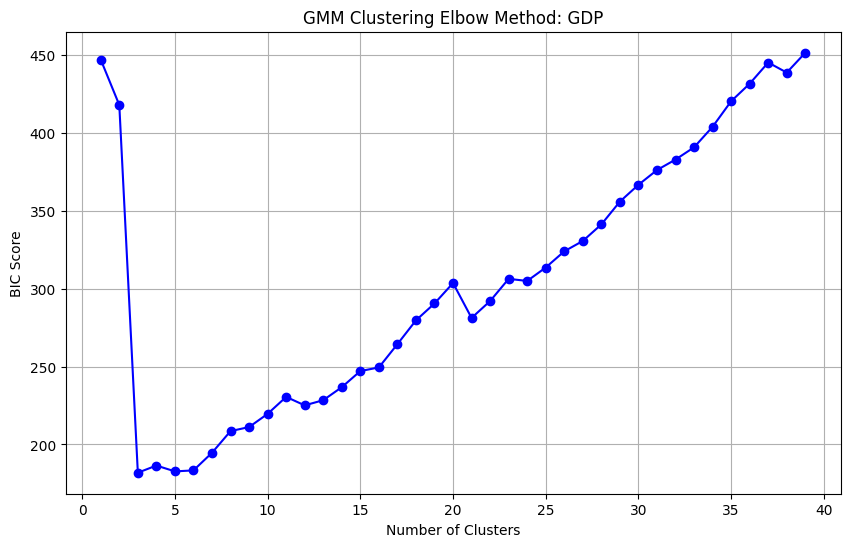

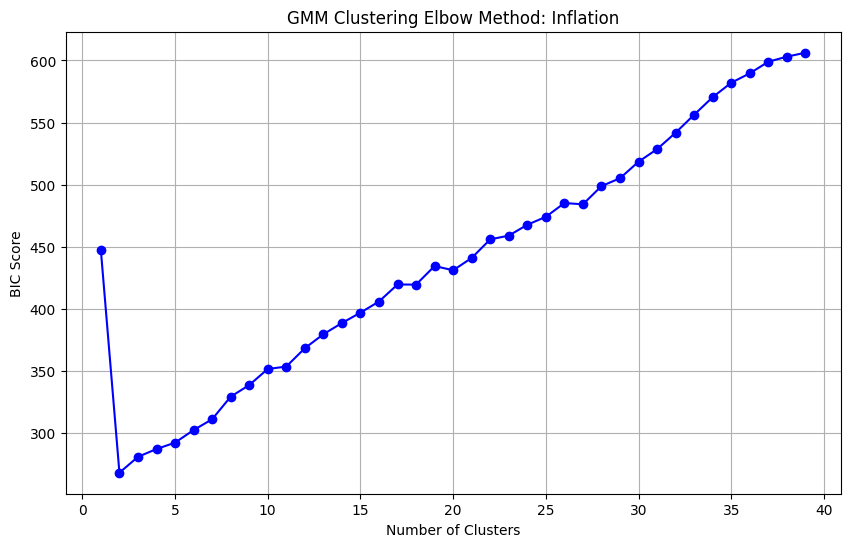

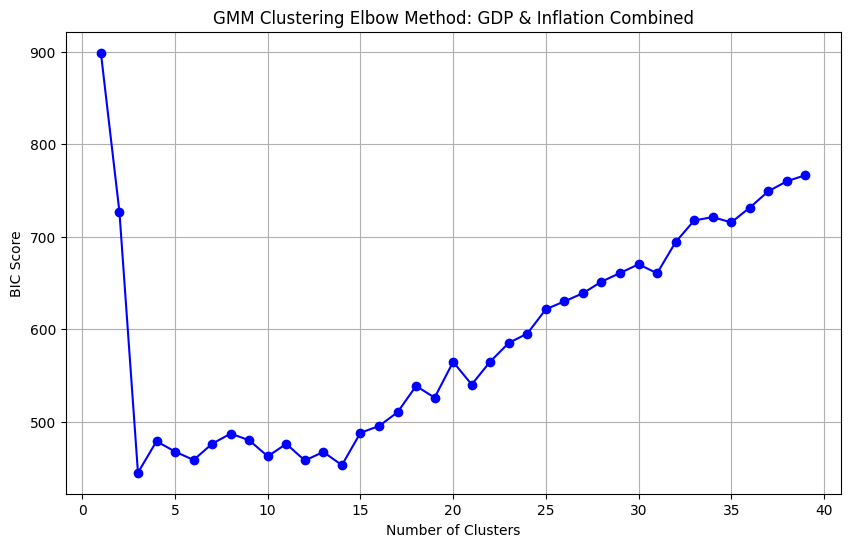

In [132]:
analyze_clustering(macro_data)

In [133]:
# For analyzing GDP alone
gmm_model_gdp, cluster_labels_gdp = fit_optimal_gmm(macro_data[['GDP']], 3)

# For analyzing Inflation alone
gmm_model_inflation, cluster_labels_inflation = fit_optimal_gmm(macro_data[['Inflation']], 2)

# For analyzing both together
gmm_model_combined, cluster_labels_combined = fit_optimal_gmm(macro_data[['GDP', 'Inflation']], 3)

In [134]:
macro_data['GDP_Cluster'] = cluster_labels_gdp
macro_data['Inflation_Cluster'] = cluster_labels_inflation
macro_data['Combined_Cluster'] = cluster_labels_combined

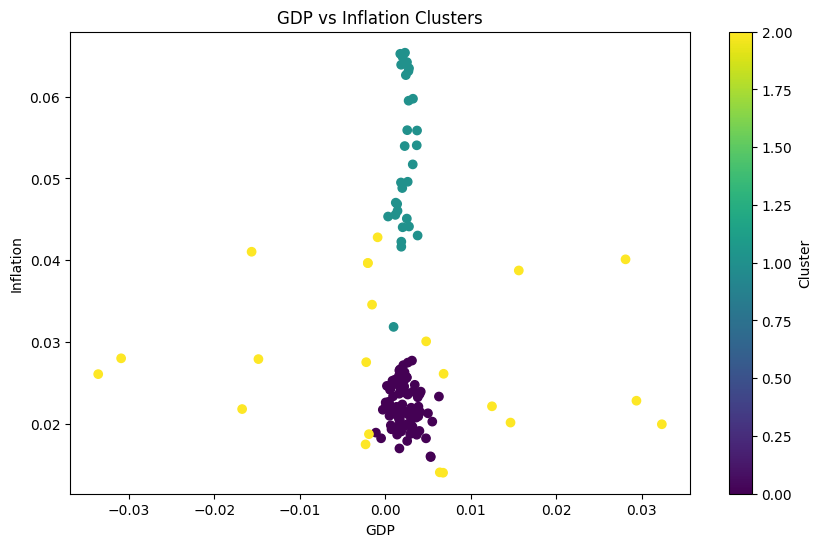

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(macro_data['GDP'], macro_data['Inflation'], c=cluster_labels_combined)
plt.xlabel('GDP')
plt.ylabel('Inflation')
plt.title('GDP vs Inflation Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [149]:
def analyze_gmm_clusters(macro_data, asset_returns, gmm_model, cluster_labels, analysis_type='Combined'):
    """
    Analyze asset returns across different GMM clusters.
    
    Parameters:
    macro_data: DataFrame with GDP and Inflation
    asset_returns: DataFrame with sector returns (X)
    gmm_model: Fitted GaussianMixture model
    cluster_labels: Array of cluster labels from GMM
    analysis_type: String indicating analysis type ('GDP', 'Inflation', or 'Combined')
    """
    # Add cluster labels to macro_data
    macro_data[f'{analysis_type}_Cluster'] = cluster_labels
    
    # Ensure dates are datetime
    macro_data.index = pd.to_datetime(macro_data.index)
    asset_returns.index = pd.to_datetime(asset_returns.index)
    
    # Merge cluster information with returns
    combined_data = asset_returns.merge(
        macro_data[[f'{analysis_type}_Cluster', 'GDP', 'Inflation']], 
        left_index=True, 
        right_index=True,
        how='left'
    )
    
    # Calculate cluster characteristics
    cluster_stats = pd.DataFrame()
    for cluster in range(gmm_model.n_components):
        cluster_data = combined_data[combined_data[f'{analysis_type}_Cluster'] == cluster]
        
        # Calculate statistics for each sector
        mean_returns = cluster_data[asset_returns.columns].mean()
        volatility = cluster_data[asset_returns.columns].std()
        sharpe = mean_returns / volatility
        
        # Store results
        cluster_stats[f'Cluster_{cluster+1}_Mean'] = mean_returns
        cluster_stats[f'Cluster_{cluster+1}_Vol'] = volatility
        cluster_stats[f'Cluster_{cluster+1}_Sharpe'] = sharpe
        
    return cluster_stats, combined_data

def plot_cluster_analysis(macro_data, asset_returns, cluster_stats, combined_data, 
                         gmm_model, cluster_labels, analysis_type='Combined'):
    """
    Create visualizations for GMM cluster analysis.
    """
    # 1. Plot clusters over time
    plt.figure(figsize=(15, 6))
    time_plot = plt.plot(macro_data.index, cluster_labels + 1, 'o-')  # Adding 1 to make clusters 1-based
    plt.title(f'Economic Clusters Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cluster')
    plt.yticks(range(1, gmm_model.n_components + 1))
    plt.grid(True)
    plt.show()

    # 2. Plot mean returns by cluster
    plt.figure(figsize=(15, 8))
    mean_returns = cluster_stats[[col for col in cluster_stats.columns if 'Mean' in col]]
    mean_returns.plot(kind='bar')
    plt.title(f'Mean Asset Returns by Cluster')
    plt.xticks(rotation=45)
    plt.ylabel('Return (%)')
    plt.tight_layout()
    plt.show()

    # 3. Plot cluster distributions in GDP-Inflation space
    if analysis_type == 'Combined':
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(macro_data['GDP'], macro_data['Inflation'], 
                            c=cluster_labels, cmap='viridis')
        
        # Add cluster centers and confidence ellipses
        for i, (mean, covar) in enumerate(zip(gmm_model.means_, gmm_model.covariances_)):
            if covar.shape == (2, 2):
                v, w = np.linalg.eigh(covar)
                v = 2. * np.sqrt(2.) * np.sqrt(v)
                u = w[0] / np.linalg.norm(w[0])
                angle = np.arctan(u[1] / u[0])
                angle = 180. * angle / np.pi
                ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle)
                ell.set_alpha(0.3)
                ell.set_facecolor(plt.cm.viridis(i / gmm_model.n_components))
                plt.gca().add_patch(ell)
                plt.plot(mean[0], mean[1], 'k+', markersize=10)
                plt.annotate(f'Cluster {i+1}', (mean[0], mean[1]))
        
        plt.colorbar(scatter, label='Cluster')
        plt.xlabel('GDP Growth (%)')
        plt.ylabel('Inflation (%)')
        plt.title('Economic Regime Classification')
        plt.show()

    # 4. Plot sector returns distribution by cluster
    n_sectors = len(asset_returns.columns)
    n_cols = 3
    n_rows = (n_sectors + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 4*n_rows))
    for i, sector in enumerate(asset_returns.columns, 1):
        plt.subplot(n_rows, n_cols, i)
        for cluster in range(gmm_model.n_components):
            cluster_data = combined_data[combined_data[f'{analysis_type}_Cluster'] == cluster]
            sns.kdeplot(data=cluster_data[sector], label=f'Cluster {cluster+1}')
        plt.title(f'{sector} Returns by Cluster')
        plt.xlabel('Returns (%)')
        plt.legend()
    plt.tight_layout()
    plt.show()

def run_cluster_analysis(macro_data, asset_returns, gmm_model, cluster_labels, analysis_type='Combined'):
    """
    Run complete cluster analysis
    """
    # 1. Analyze returns by cluster
    cluster_stats, combined_data = analyze_gmm_clusters(
        macro_data, asset_returns, gmm_model, cluster_labels, analysis_type
    )
    
    # 2. Create visualizations
    plot_cluster_analysis(
        macro_data, asset_returns, cluster_stats, combined_data, 
        gmm_model, cluster_labels, analysis_type
    )
    
    # 3. Calculate cluster economic characteristics
    cluster_econ = combined_data.groupby(f'{analysis_type}_Cluster')[['GDP', 'Inflation']].agg({
        'GDP': ['mean', 'std'],
        'Inflation': ['mean', 'std']
    }).round(2)
    
    return cluster_stats, cluster_econ, combined_data

# Example usage
"""
cluster_stats, cluster_econ, combined_data = run_cluster_analysis(
    macro_data=macro_data,
    asset_returns=X,
    gmm_model=gmm_model_combined,
    cluster_labels=cluster_labels_combined,
    analysis_type='Combined'
)
"""

"\ncluster_stats, cluster_econ, combined_data = run_cluster_analysis(\n    macro_data=macro_data,\n    asset_returns=X,\n    gmm_model=gmm_model_combined,\n    cluster_labels=cluster_labels_combined,\n    analysis_type='Combined'\n)\n"

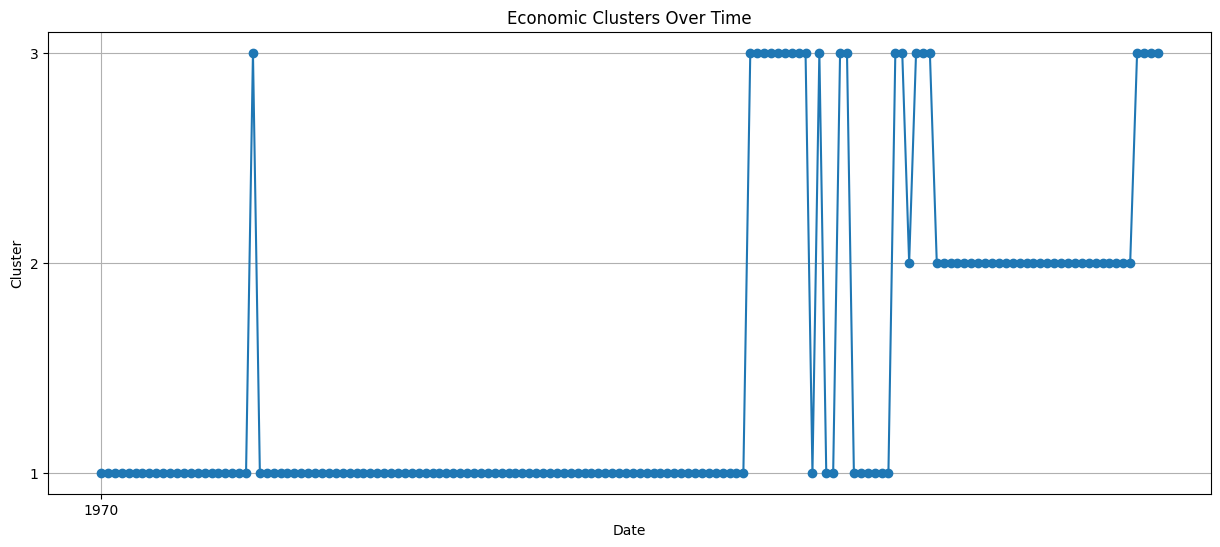

<Figure size 1500x800 with 0 Axes>

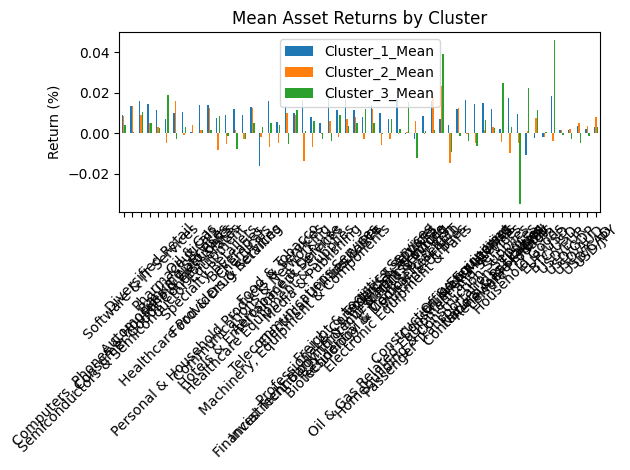

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

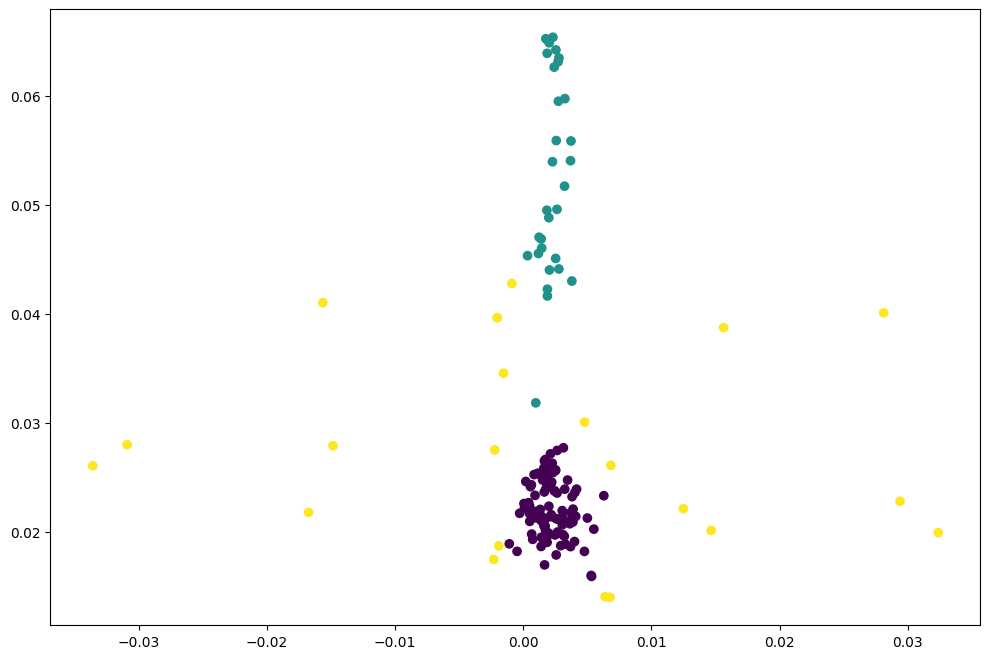

In [150]:
# Run the analysis
cluster_stats, cluster_econ, combined_data = run_cluster_analysis(
    macro_data=macro_data,
    asset_returns=X,
    gmm_model=gmm_model_combined,
    cluster_labels=cluster_labels_combined,
    analysis_type='Combined'
)

# Print cluster statistics
print("\nCluster Economic Characteristics:")
print(cluster_econ)

print("\nAsset Return Statistics by Cluster:")
print(cluster_stats)

# Get the current cluster
current_cluster = cluster_labels_combined[-1] + 1  # Adding 1 to make it 1-based
print(f"\nCurrent Economic Cluster: {current_cluster}")

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec

def plot_gmm_analysis(macro_data, X, cluster_labels_combined, gmm_model_combined):
    """
    Create comprehensive visualizations for GMM clustering analysis
    """
    # Set the style
    plt.style.use('seaborn')
    
    # Create a figure with multiple subplots using GridSpec
    fig = plt.figure(figsize=(20, 25))
    gs = GridSpec(4, 2, figure=fig)
    
    # 1. Plot GDP-Inflation space with clusters
    ax1 = fig.add_subplot(gs[0, :])
    scatter = ax1.scatter(macro_data['GDP'], macro_data['Inflation'], 
                         c=cluster_labels_combined + 1, 
                         cmap='viridis', 
                         s=100)
    
    # Add GMM components
    for i, (mean, covar) in enumerate(zip(gmm_model_combined.means_, gmm_model_combined.covariances_)):
        if covar.shape == (2, 2):
            v, w = np.linalg.eigh(covar)
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            u = w[0] / np.linalg.norm(w[0])
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi
            ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle,
                                               alpha=0.3,
                                               facecolor=plt.cm.viridis((i+1)/gmm_model_combined.n_components))
            ax1.add_patch(ell)
            ax1.plot(mean[0], mean[1], 'k+', markersize=15)
            ax1.annotate(f'Cluster {i+1}', (mean[0], mean[1]), 
                        xytext=(10, 10), textcoords='offset points',
                        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    
    ax1.set_xlabel('GDP Growth (%)', fontsize=12)
    ax1.set_ylabel('Inflation (%)', fontsize=12)
    ax1.set_title('Economic Regimes: GDP vs Inflation', fontsize=14, pad=20)
    plt.colorbar(scatter, label='Cluster', ticks=range(1, gmm_model_combined.n_components + 1))
    
    # 2. Plot clusters over time
    ax2 = fig.add_subplot(gs[1, :])
    time_plot = ax2.plot(macro_data.index, cluster_labels_combined + 1, 'o-', linewidth=2)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Cluster', fontsize=12)
    ax2.set_title('Economic Regime Evolution Over Time', fontsize=14)
    ax2.grid(True)
    ax2.set_yticks(range(1, gmm_model_combined.n_components + 1))
    
    # 3. Plot mean returns by cluster
    cluster_returns = []
    for cluster in range(gmm_model_combined.n_components):
        mask = cluster_labels_combined == cluster
        cluster_returns.append(X.loc[macro_data.index[mask]].mean())
    
    ax3 = fig.add_subplot(gs[2, :])
    cluster_returns_df = pd.DataFrame(cluster_returns, 
                                    index=[f'Cluster {i+1}' for i in range(gmm_model_combined.n_components)])
    cluster_returns_df.T.plot(kind='bar', ax=ax3)
    ax3.set_title('Mean Asset Returns by Cluster', fontsize=14)
    ax3.set_xlabel('Assets', fontsize=12)
    ax3.set_ylabel('Return (%)', fontsize=12)
    ax3.legend(title='Clusters')
    plt.xticks(rotation=45)
    
    # 4. Plot regime characteristics
    cluster_stats = pd.DataFrame()
    for cluster in range(gmm_model_combined.n_components):
        mask = cluster_labels_combined == cluster
        cluster_stats[f'Cluster {cluster+1}'] = pd.Series({
            'GDP Mean': macro_data.loc[mask, 'GDP'].mean(),
            'GDP Std': macro_data.loc[mask, 'GDP'].std(),
            'Inflation Mean': macro_data.loc[mask, 'Inflation'].mean(),
            'Inflation Std': macro_data.loc[mask, 'Inflation'].std(),
            'Duration (months)': sum(mask)
        })
    
    ax4 = fig.add_subplot(gs[3, :])
    cluster_stats.T[['GDP Mean', 'Inflation Mean']].plot(kind='bar', ax=ax4, yerr=cluster_stats.T[['GDP Std', 'Inflation Std']].values.T)
    ax4.set_title('Cluster Economic Characteristics', fontsize=14)
    ax4.set_xlabel('Cluster', fontsize=12)
    ax4.set_ylabel('Percentage (%)', fontsize=12)
    ax4.legend()
    plt.xticks(rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    # Return cluster statistics for reference
    return cluster_stats

def plot_cluster_returns_distributions(X, macro_data, cluster_labels_combined):
    """
    Plot return distributions for each asset across clusters
    """
    n_assets = len(X.columns)
    n_cols = 3
    n_rows = (n_assets + n_cols - 1) // n_cols
    
    plt.figure(figsize=(20, 5*n_rows))
    
    for i, asset in enumerate(X.columns, 1):
        plt.subplot(n_rows, n_cols, i)
        for cluster in range(len(np.unique(cluster_labels_combined))):
            mask = cluster_labels_combined == cluster
            returns = X.loc[macro_data.index[mask], asset]
            sns.kdeplot(data=returns, label=f'Cluster {cluster+1}')
        plt.title(f'{asset} Returns Distribution by Cluster')
        plt.xlabel('Returns (%)')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage:
"""
# Run the visualizations
cluster_stats = plot_gmm_analysis(macro_data, X, cluster_labels_combined, gmm_model_combined)
plot_cluster_returns_distributions(X, macro_data, cluster_labels_combined)

# Print cluster statistics
print("\nCluster Statistics:")
print(cluster_stats)
"""

'\n# Run the visualizations\ncluster_stats = plot_gmm_analysis(macro_data, X, cluster_labels_combined, gmm_model_combined)\nplot_cluster_returns_distributions(X, macro_data, cluster_labels_combined)\n\n# Print cluster statistics\nprint("\nCluster Statistics:")\nprint(cluster_stats)\n'

In [152]:
def plot_gmm_analysis(data, features, cluster_labels, gmm_model):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Example visualization for clusters
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=cluster_labels, palette='viridis')
    plt.title("GMM Clustering Analysis")
    plt.show()
    
    # Example statistics calculation
    cluster_stats = data.groupby(cluster_labels).mean()
    return cluster_stats


In [153]:
def plot_cluster_returns_distributions(features, data, cluster_labels):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Example distribution plot
    data['Cluster'] = cluster_labels
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x='Cluster', y='returns')  # Replace 'returns' with a relevant column
    plt.title("Cluster Returns Distribution")
    plt.show()

In [154]:
import pandas as pd
import numpy as np
from tabulate import tabulate
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

def create_complete_tables(X, macro_data, cluster_labels_combined):
    """
    Create complete tables with all statistics for each cluster
    """
    # Create dictionary to store all cluster data
    cluster_data = {}
    
    # Calculate statistics for each cluster
    for cluster in range(len(np.unique(cluster_labels_combined))):
        mask = cluster_labels_combined == cluster
        cluster_returns = X.loc[macro_data.index[mask]]
        cluster_macro = macro_data.loc[mask]
        
        # Store all relevant statistics
        cluster_data[f'Cluster {cluster+1}'] = {
            'Economic Environment': {
                'GDP Mean (%)': cluster_macro['GDP'].mean(),
                'GDP Std (%)': cluster_macro['GDP'].std(),
                'GDP Min (%)': cluster_macro['GDP'].min(),
                'GDP Max (%)': cluster_macro['GDP'].max(),
                'Inflation Mean (%)': cluster_macro['Inflation'].mean(),
                'Inflation Std (%)': cluster_macro['Inflation'].std(),
                'Inflation Min (%)': cluster_macro['Inflation'].min(),
                'Inflation Max (%)': cluster_macro['Inflation'].max(),
                'Number of Periods': sum(mask),
                'Percentage of Time (%)': (sum(mask) / len(mask) * 100)
            },
            'Returns Statistics': {
                sector: {
                    'Mean Return (%)': cluster_returns[sector].mean(),
                    'Std Dev (%)': cluster_returns[sector].std(),
                    'Min (%)': cluster_returns[sector].min(),
                    'Max (%)': cluster_returns[sector].max(),
                    'Sharpe Ratio': (cluster_returns[sector].mean() / cluster_returns[sector].std() * np.sqrt(12)) if cluster_returns[sector].std() != 0 else np.nan,
                    'Skewness': cluster_returns[sector].skew(),
                    'Kurtosis': cluster_returns[sector].kurtosis(),
                    'VaR 95% (%)': cluster_returns[sector].quantile(0.05),
                    'CVaR 95% (%)': cluster_returns[sector][cluster_returns[sector] <= cluster_returns[sector].quantile(0.05)].mean()
                } for sector in X.columns
            }
        }
    
    # Create formatted tables
    
    # 1. Economic Environment Table
    econ_data = pd.DataFrame({cluster: data['Economic Environment'] 
                             for cluster, data in cluster_data.items()}).round(2)
    
    # 2. Detailed Returns Statistics Table
    returns_data = {}
    metrics = ['Mean Return (%)', 'Std Dev (%)', 'Sharpe Ratio', 'VaR 95% (%)', 'CVaR 95% (%)', 
              'Min (%)', 'Max (%)', 'Skewness', 'Kurtosis']
    
    for sector in X.columns:
        sector_data = {}
        for metric in metrics:
            for cluster, data in cluster_data.items():
                if metric not in sector_data:
                    sector_data[metric] = {}
                sector_data[metric][cluster] = data['Returns Statistics'][sector][metric]
        returns_data[sector] = pd.DataFrame(sector_data).round(2)
    
    return econ_data, returns_data

def print_complete_tables(econ_data, returns_data):
    """
    Print all tables in a clear, formatted way
    """
    print("\n" + "="*120)
    print("ECONOMIC CHARACTERISTICS BY CLUSTER")
    print("="*120)
    print(tabulate(econ_data.T, headers='keys', tablefmt='pretty', floatfmt='.2f'))
    
    for sector, data in returns_data.items():
        print("\n" + "="*120)
        print(f"RETURN STATISTICS FOR {sector}")
        print("="*120)
        print(tabulate(data, headers='keys', tablefmt='pretty', floatfmt='.2f'))

def create_correlation_tables(X, macro_data, cluster_labels_combined):
    """
    Create correlation tables for each cluster
    """
    correlation_tables = {}
    
    for cluster in range(len(np.unique(cluster_labels_combined))):
        mask = cluster_labels_combined == cluster
        cluster_data = pd.concat([
            X.loc[macro_data.index[mask]],
            macro_data.loc[mask, ['GDP', 'Inflation']]
        ], axis=1)
        
        correlation_tables[f'Cluster {cluster+1}'] = cluster_data.corr().round(2)
    
    return correlation_tables

def print_correlation_tables(correlation_tables):
    """
    Print correlation tables for each cluster
    """
    for cluster, corr_matrix in correlation_tables.items():
        print("\n" + "="*120)
        print(f"CORRELATION MATRIX FOR {cluster}")
        print("="*120)
        print(tabulate(corr_matrix, headers='keys', tablefmt='pretty', floatfmt='.2f'))

# Example usage:
"""
# Generate complete tables
econ_data, returns_data = create_complete_tables(X, macro_data, cluster_labels_combined)

# Print all tables
print_complete_tables(econ_data, returns_data)

# Generate and print correlation tables
correlation_tables = create_correlation_tables(X, macro_data, cluster_labels_combined)
print_correlation_tables(correlation_tables)
"""

'\n# Generate complete tables\necon_data, returns_data = create_complete_tables(X, macro_data, cluster_labels_combined)\n\n# Print all tables\nprint_complete_tables(econ_data, returns_data)\n\n# Generate and print correlation tables\ncorrelation_tables = create_correlation_tables(X, macro_data, cluster_labels_combined)\nprint_correlation_tables(correlation_tables)\n'

In [119]:
# Generate complete tables
econ_data, returns_data = create_complete_tables(X, macro_data, cluster_labels_combined)

# Print all tables
print_complete_tables(econ_data, returns_data)

# Generate and print correlation tables
correlation_tables = create_correlation_tables(X, macro_data, cluster_labels_combined)
print_correlation_tables(correlation_tables)

# Save tables to Excel if needed
with pd.ExcelWriter('cluster_analysis_results.xlsx') as writer:
    econ_data.to_excel(writer, sheet_name='Economic_Environment')
    for sector, data in returns_data.items():
        data.to_excel(writer, sheet_name=f'{sector[:31]}')  # Excel sheet names limited to 31 chars
    for cluster, corr_matrix in correlation_tables.items():
        corr_matrix.to_excel(writer, sheet_name=f'Correlations_{cluster[-1]}')


ECONOMIC CHARACTERISTICS BY CLUSTER
+-----------+--------------+-------------+-------------+-------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------------------+
|           | GDP Mean (%) | GDP Std (%) | GDP Min (%) | GDP Max (%) | Inflation Mean (%) | Inflation Std (%) | Inflation Min (%) | Inflation Max (%) | Number of Periods | Percentage of Time (%) |
+-----------+--------------+-------------+-------------+-------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------------------+
| Cluster 1 |     0.0      |     0.0     |    -0.0     |    0.01     |        0.02        |        0.0        |       0.02        |       0.03        |       102.0       |         66.23          |
| Cluster 2 |     0.0      |     0.0     |     0.0     |     0.0     |        0.05        |       0.01        |       0.03        |       0.07        |       30.0        |    

ValueError: Invalid character / found in sheet title